# Reinforcement Learning --> Q-learning

In [33]:
#Import dependencies
import numpy as np 
import gym
import random
import matplotlib.pyplot as plt

Create Enviroment

In [2]:
env = gym.make("FrozenLake-v0")
env.render()


SFFF
FHFH
FFFH
HFFG


In [3]:
action_size = env.action_space.n
print("Action Size", action_size)

Action Size 4


In [4]:
state_size = env.observation_space.n
print("State Size",state_size)

State Size 16


Create Q-table

In [5]:
qtable = np.zeros([state_size,action_size])
qtable

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Create Hyper-parameters

In [6]:
#Define Hyperparameter
learning_rate = 0.8            #Learning Rate
gamma = 0.95                   #Discount Factor

total_train_episode = 15000    #Total episode to train our algorithm
total_test_episode = 20      #Number of Episode to test our algo
max_step =99                   #Maximum step per episode



#Exploration Parameters

epsilon = 1.0                  #Exploration rate
max_epsilon = 1.0              #Exploration probability at start
min_epsilon = 0.01             #Minimum Exploration probability 
decay_rate = 0.005             #Decay rate

Implementation  of Q-learning algorithm

In [32]:
for episode in range(total_train_episode):
    #reset the enviroment
    state = env.reset()
    step = 0 
    done = False
    rewards = []
    total_rewards = 0
    
    for step in range(max_step):
        exp_exp_tradeoff = random.uniform(0,1)
## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon: 
            action = np.argmax(qtable[state,:])
            
         # Else doing a random choice --> exploration   
        
        else:
            action = env.action_space.sample()
            
        
        
        new_state,reward,done,info = env.step(action)   # Take the action (a) and observe the outcome state(s') and reward (r)
        
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        #Using Bellman Equation
        qtable[state,action]= qtable[state,action] + learning_rate*(reward +gamma * np.max(qtable[new_state,:]) - qtable[state,action])
        
        total_rewards += reward
        
        #Our Newstate
        state = new_state
        
        
        if done== True:
            
            #print ("Score", total_rewards)
            break
            
    epsilon = min_epsilon +(max_epsilon-min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)
    
print ("Score over time: " +  str(sum(rewards)/total_train_episode))
print(qtable)

#env.render()
#plt.plot(sum(rewards)/total_train_episode)

Score over time: 6.666666666666667e-05
[[3.26623933e-01 1.08836218e-01 2.20346744e-02 2.62108646e-02]
 [2.77294081e-03 5.07220414e-03 7.80388018e-03 2.89324738e-01]
 [4.62695749e-03 6.79099117e-03 4.39680102e-03 1.39298498e-01]
 [8.15083460e-03 4.91913331e-03 5.07007929e-03 2.41931470e-02]
 [2.60642484e-01 1.29953230e-01 4.18463302e-02 8.48845017e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.04098697e-02 5.82696928e-05 4.30634664e-05 3.06294958e-09]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.82220230e-02 8.83783975e-02 1.26328169e-02 2.37330405e-01]
 [1.92824333e-03 2.71108005e-01 8.60609020e-02 1.76069327e-02]
 [7.51434848e-01 1.05871750e-03 6.37003732e-03 3.02068376e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.73852309e-02 1.21339144e-01 5.04579520e-01 7.68476198e-03]
 [2.05643162e-01 9.17989538e-01 1.03065476e-01 1.67924968e-01]
 [0.00000000e+00

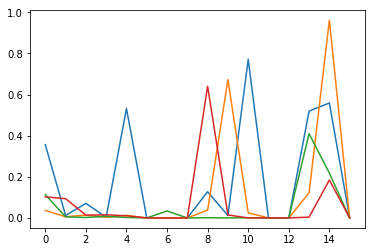

In [20]:
plt.plot(qtable)

In [27]:
env.reset()

for episode in range(total_test_episode):
    state = env.reset()
    step = 0
    done = False
    print("---------------------------------------")
    print("EPISODE ", episode)

    for step in range(max_step):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            
            # We print the number of step it took.
            print("Number of steps", step)
            break
        state = new_state
env.close()
#plt.plot(action)

---------------------------------------
EPISODE  0
  (Left)
SFFF
FHFH
FFFH
HFFG
Number of steps 12
---------------------------------------
EPISODE  1
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 8
---------------------------------------
EPISODE  2
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 77
---------------------------------------
EPISODE  3
---------------------------------------
EPISODE  4
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 25
---------------------------------------
EPISODE  5
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 6
---------------------------------------
EPISODE  6
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 18
---------------------------------------
EPISODE  7
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 78
---------------------------------------
EPISODE  8
  (Left)
SFFF
FHFH
FFFH
HFFG
Number of steps 5
---------------------------------------
EPISODE  9
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 13
---------------------------------------
EPISODE  10
---------

# Q-Learning with Neural Networks

In [15]:
import gym
import numpy as np
import random
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
env = gym.make('FrozenLake-v0')
env.render()


SFFF
FHFH
FFFH
HFFG


In [17]:
tf.reset_default_graph()

In [18]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [19]:
init = tf.initialize_all_variables()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print( "Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Percent of succesful episodes: 0.424%


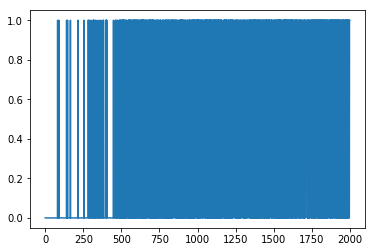

In [22]:
plt.plot(rList)

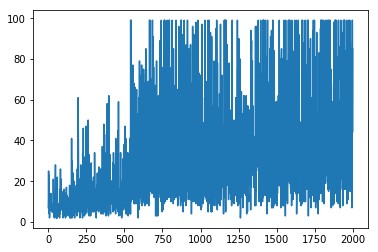

In [23]:
plt.plot(jList)